In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [21]:
stup= pd.read_csv("startups.csv")

In [22]:
stup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
stup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
stup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [24]:
sdum=pd.get_dummies(stup)

In [26]:
sdum

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [27]:
sdum.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


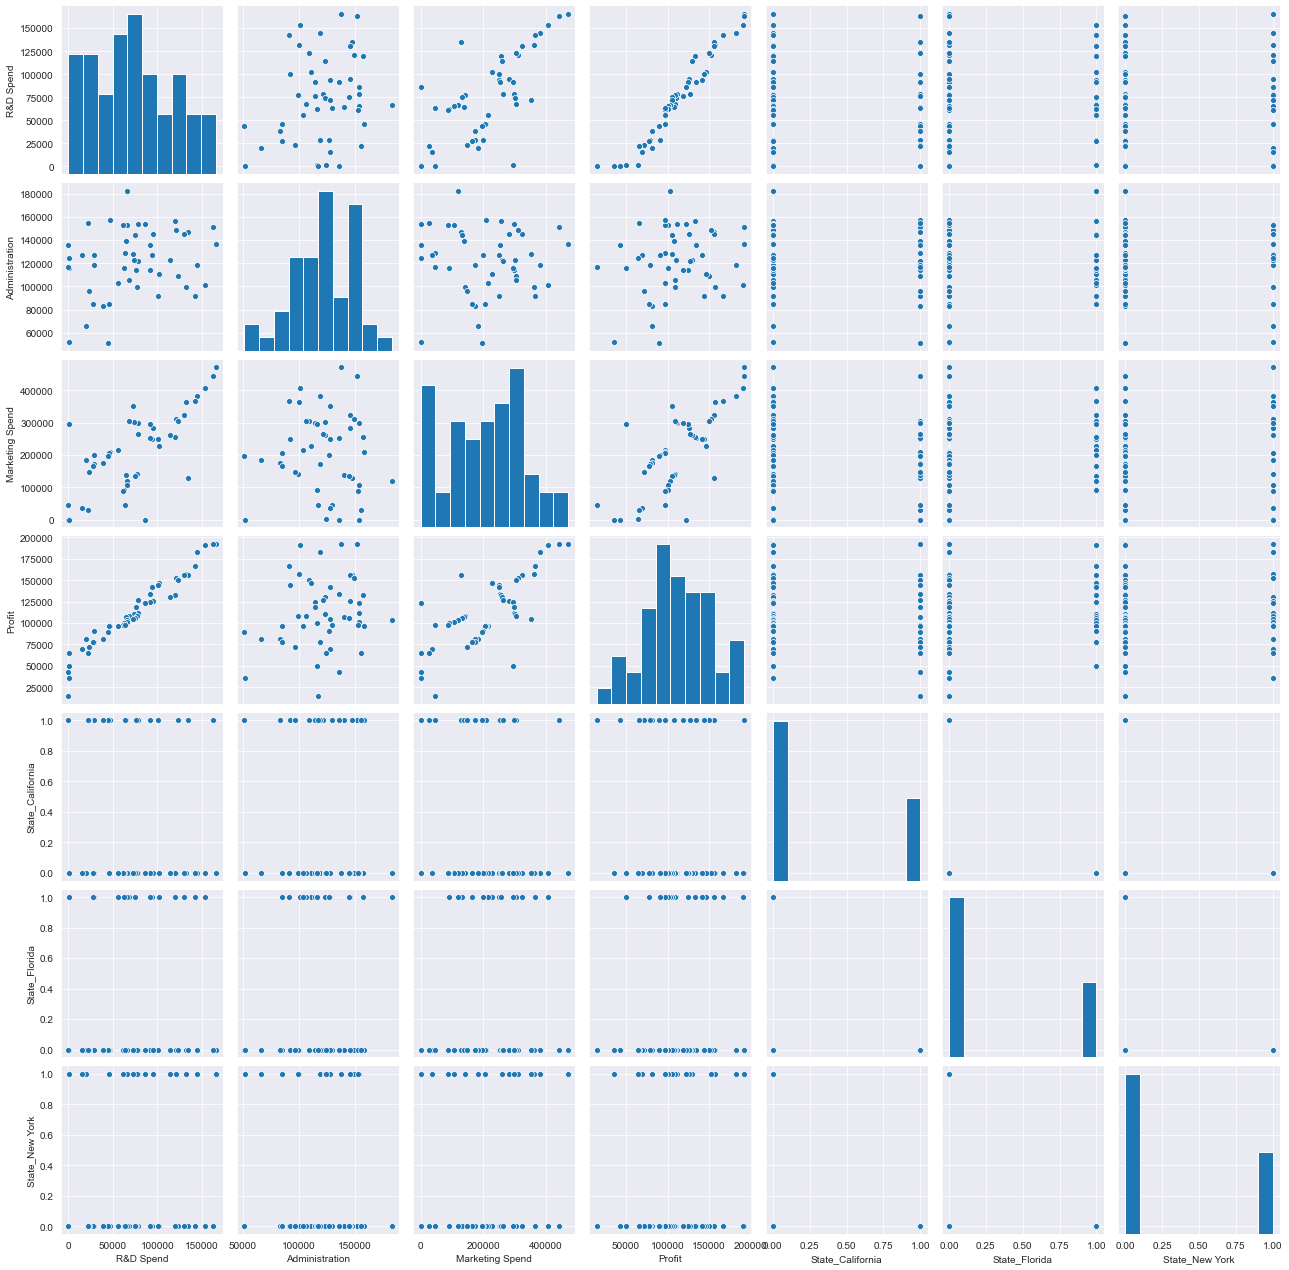

In [28]:
sns.set_style(style='darkgrid')
sns.pairplot(sdum)

In [31]:
rd=pd.DataFrame(sdum['R&D Spend'])
adm=pd.DataFrame(sdum['Administration'])
mar=pd.DataFrame(sdum['Marketing Spend'])
pro=pd.DataFrame(sdum['Profit'])
s1=pd.DataFrame(sdum['State_California'])
s2=pd.DataFrame(sdum['State_Florida'])
s3=pd.DataFrame(sdum['State_New York'])

In [32]:
import statsmodels.formula.api as smf 
model = smf.ols('pro~rd+adm+mar+s1+s2+s3',data=sdum).fit()

In [34]:
model.params

Intercept    37633.233317
rd               0.806023
adm             -0.027004
mar              0.026980
s1           12492.110514
s2           12690.899307
s3           12450.223495
dtype: float64

In [35]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.417409
rd           17.368580
adm          -0.517012
mar           1.573889
s1            5.099242
s2            4.654306
s3            5.007401
dtype: float64 
 Intercept    2.807645e-09
rd           2.578772e-21
adm          6.077373e-01
mar          1.226769e-01
s1           6.942555e-06
s2           2.992503e-05
s3           9.409010e-06
dtype: float64


In [36]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [37]:
ml_v=smf.ols('pro~adm',data = sdum).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    3.040044
adm          1.419493
dtype: float64 
 Intercept    0.003824
adm          0.162217
dtype: float64


In [38]:
ml_v=smf.ols('pro~mar',data = sdum).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    7.808356
mar          7.802657
dtype: float64 
 Intercept    4.294735e-10
mar          4.381073e-10
dtype: float64


In [39]:
ml_v=smf.ols('pro~adm+mar',data = sdum).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    1.142741
adm          2.467779
mar          8.281039
dtype: float64 
 Intercept    2.589341e-01
adm          1.729198e-02
mar          9.727245e-11
dtype: float64


In [41]:
rsq_r = smf.ols('rd~adm+mar+s1+s2+s3',data=sdum).fit().rsquared  
vif_r = 1/(1-rsq_r)
rsq_a = smf.ols('adm~rd+mar+s1+s2+s3',data=sdum).fit().rsquared  
vif_a = 1/(1-rsq_a)
rsq_m = smf.ols('mar~rd+adm+s1+s2+s3',data=sdum).fit().rsquared  
vif_m = 1/(1-rsq_m)
rsq_s1 = smf.ols('s1~adm+rd+mar+s2+s3',data=sdum).fit().rsquared  
vif_s1 = 1/(1-rsq_s1)
rsq_s2 = smf.ols('s2~adm+rd+mar+s1+s3',data=sdum).fit().rsquared  
vif_s2 = 1/(1-rsq_s2)
rsq_s3 = smf.ols('s3~adm+rd+mar+s1+s2',data=sdum).fit().rsquared  
vif_s3 = 1/(1-rsq_s3)

# Storing vif values in a data frame
d1 = {'Variables':['rd','adm','mar','s1','s2','s3'],'VIF':[vif_r,vif_a,vif_m,vif_s1,vif_s2,vif_s3]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-41-d59b362d9dbf>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif_s1 = 1/(1-rsq_s1)
<ipython-input-41-d59b362d9dbf>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif_s2 = 1/(1-rsq_s2)
<ipython-input-41-d59b362d9dbf>:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif_s3 = 1/(1-rsq_s3)


,Variables,VIF
0,rd,2.495511
1,adm,1.177766
2,mar,2.416797
3,s1,inf
4,s2,inf
5,s3,inf


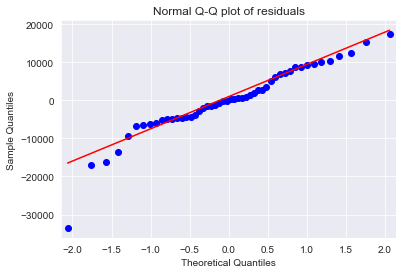

In [43]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [44]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [45]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

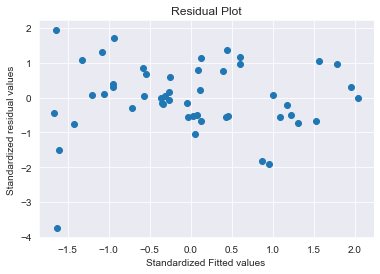

In [46]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

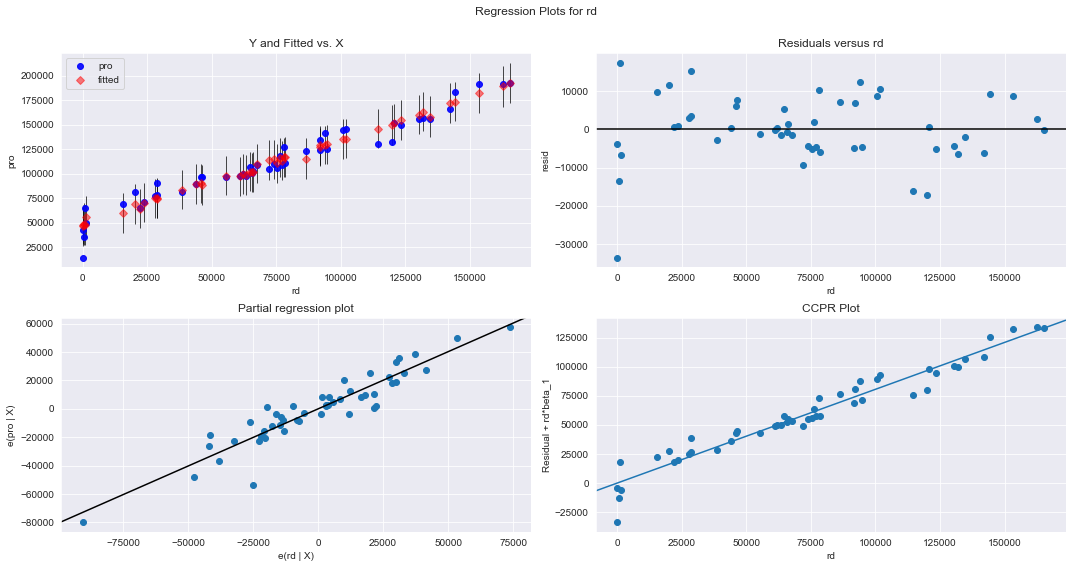

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd", fig=fig)
plt.show()

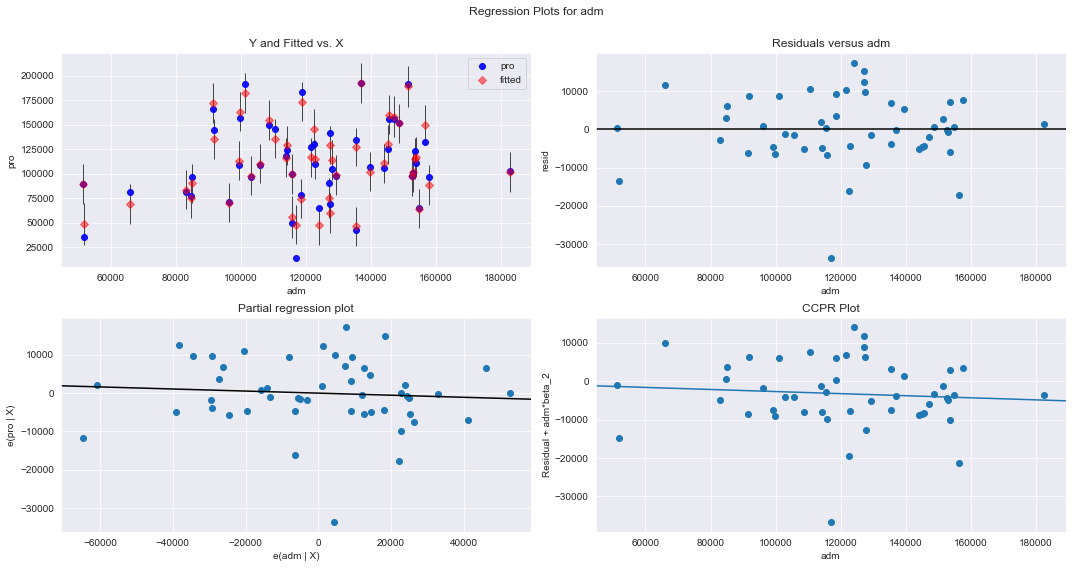

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "adm", fig=fig)
plt.show()

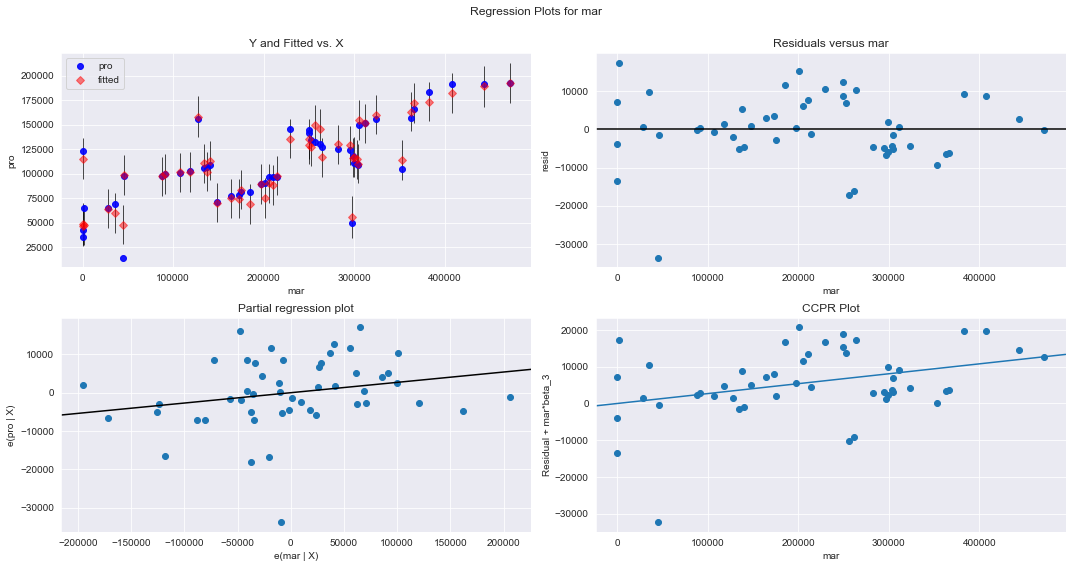

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mar", fig=fig)
plt.show()

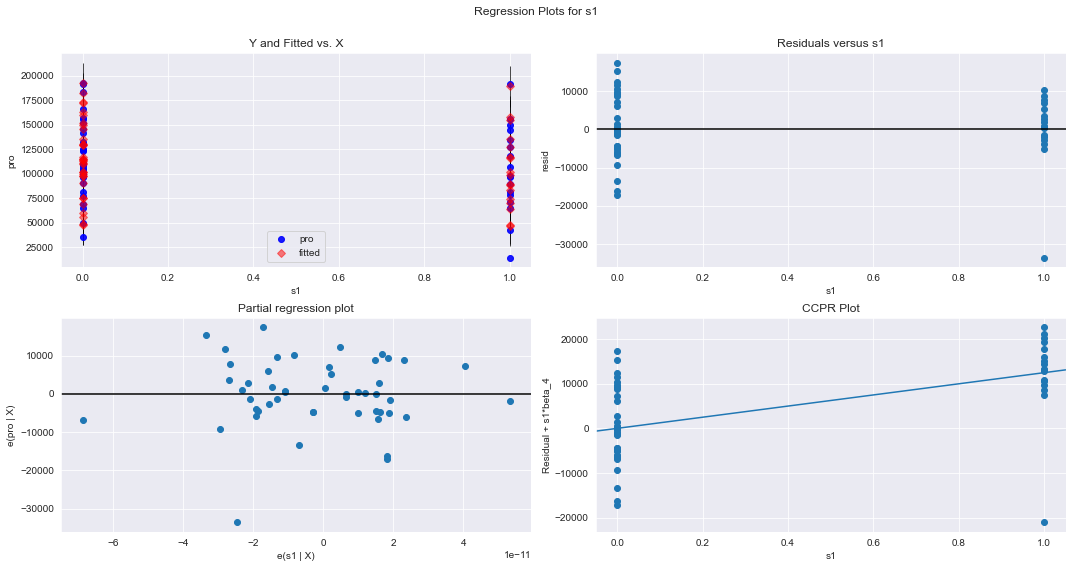

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "s1", fig=fig)
plt.show()

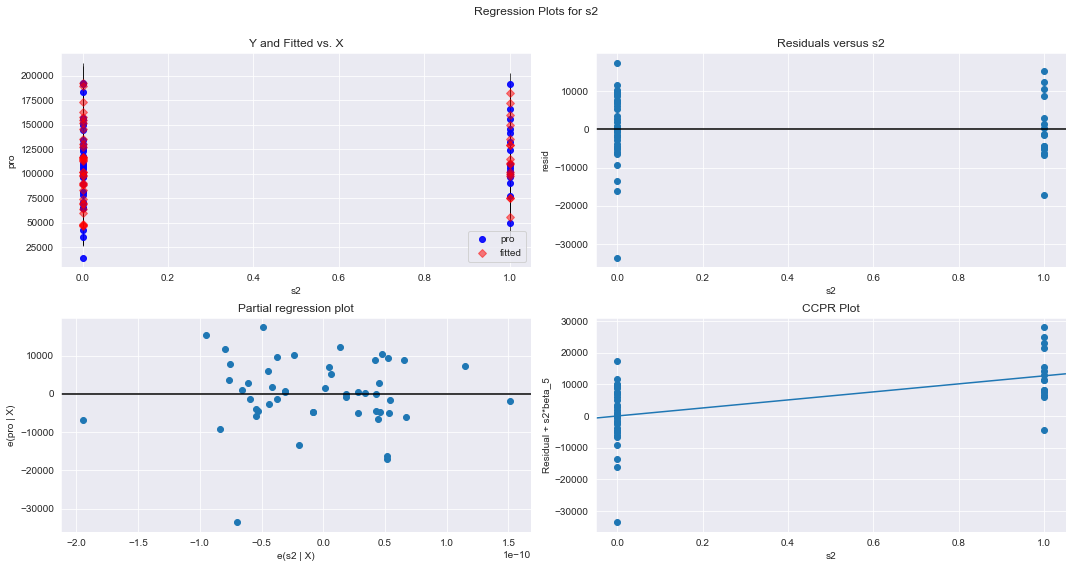

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "s2", fig=fig)
plt.show()

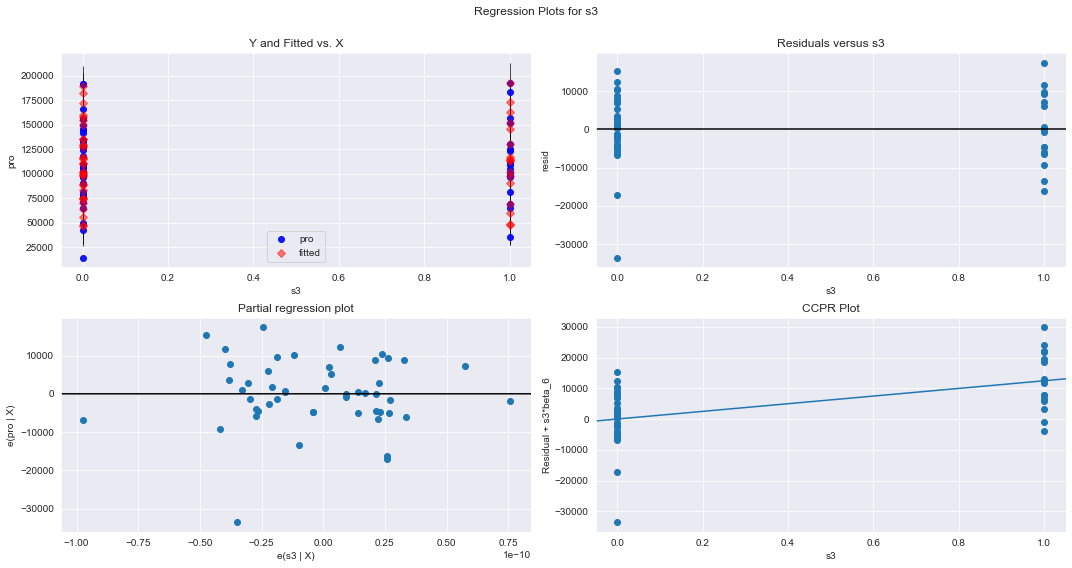

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "s3", fig=fig)
plt.show()

In [53]:
## Cook’s Distance
model_influence = model.get_influence()
(c,_ ) = model_influence.cooks_distance
c

array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
       5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

<ipython-input-55-944b163051c9>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(sdum)), np.round(c, 3))


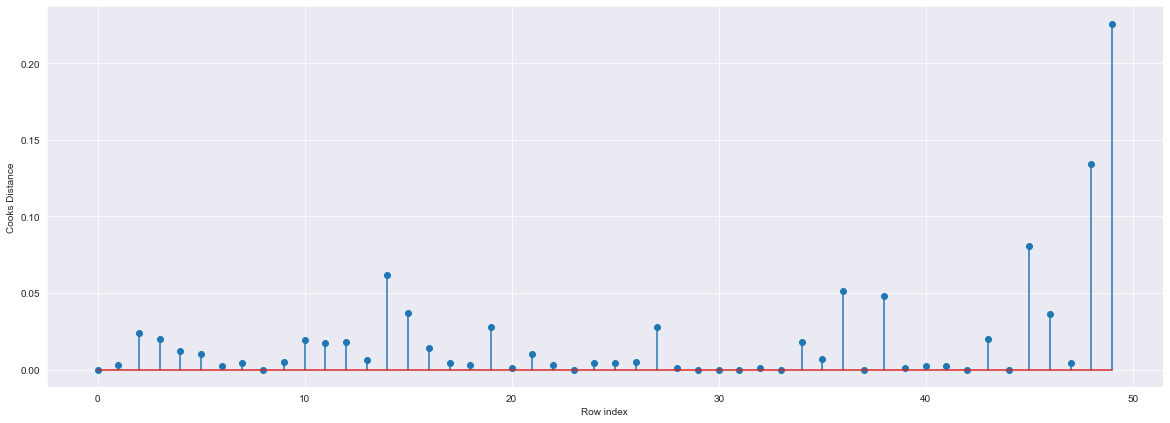

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(sdum)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
(np.argmax(c),np.max(c))

(49, 0.22625094501509238)

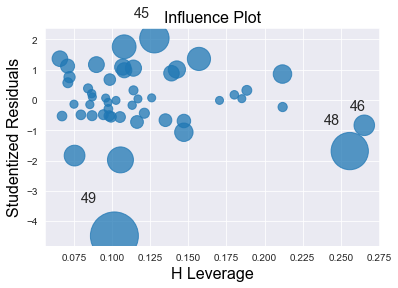

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [58]:
k = sdum.shape[1]
n = sdum.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [59]:
leverage_cutoff

0.48

In [60]:
sdum[sdum.index.isin([49])]

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [61]:
sdum.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [62]:
snew=pd.read_csv("startups.csv")

In [63]:
snew

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [64]:
stup=snew.drop(snew.index[[49]],axis=0).reset_index()

In [65]:
stup

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [66]:
stup=stup.drop(['index'],axis=1)

In [71]:
stup1=pd.get_dummies(stup)

In [72]:
r=pd.DataFrame(stup1['R&D Spend'])
a=pd.DataFrame(stup1['Administration'])
m=pd.DataFrame(stup1['Marketing Spend'])
p=pd.DataFrame(stup1['Profit'])
sa=pd.DataFrame(stup1['State_California'])
sb=pd.DataFrame(stup1['State_Florida'])
sc=pd.DataFrame(stup1['State_New York'])


In [73]:
final_ml_a= smf.ols('p~r+a+sa+sb+sc',data = stup1).fit()

In [74]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9589186975347428, 1025.511829506972)

In [75]:
final_ml_m= smf.ols('p~r+m+sa+sb+sc',data = stup1).fit()

In [76]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.9615819564241954, 1022.2275625571153)

In [ ]:
##### Comparing above R-Square and AIC values, model 'final_ml_m' has high R- square and low AIC value

In [77]:
model_influence_V = final_ml_m.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-78-f86f54c66bb9>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(stup1)),np.round(c_V,3));


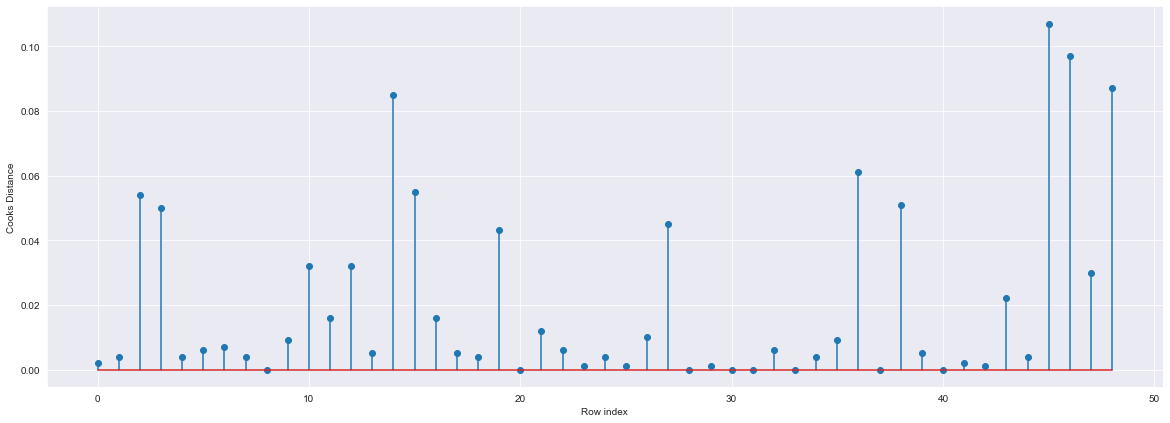

In [78]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stup1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [79]:
(np.argmax(c_V),np.max(c_V))

(45, 0.10748483729783852)

In [80]:
stup2=stup1.drop(stup1.index[[45,46]],axis=0)

In [81]:
stup3=stup2.reset_index()

In [82]:
stup4=stup3.drop(['index'],axis=1)

In [83]:
stup4

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [85]:
r1=pd.DataFrame(stup4['R&D Spend'])
a1=pd.DataFrame(stup4['Administration'])
m1=pd.DataFrame(stup4['Marketing Spend'])
p1=pd.DataFrame(stup4['Profit'])
sa1=pd.DataFrame(stup4['State_California'])
sb1=pd.DataFrame(stup4['State_Florida'])
sc1=pd.DataFrame(stup4['State_New York'])


In [86]:
#Build the model on the new data
final_ml_m= smf.ols('p1~r1+m1+sa1+sb1+sc1',data = stup4).fit()

In [87]:
model_influence_V = final_ml_m.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-89-bbcc11ca0886>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(stup4)),np.round(c_V,3));


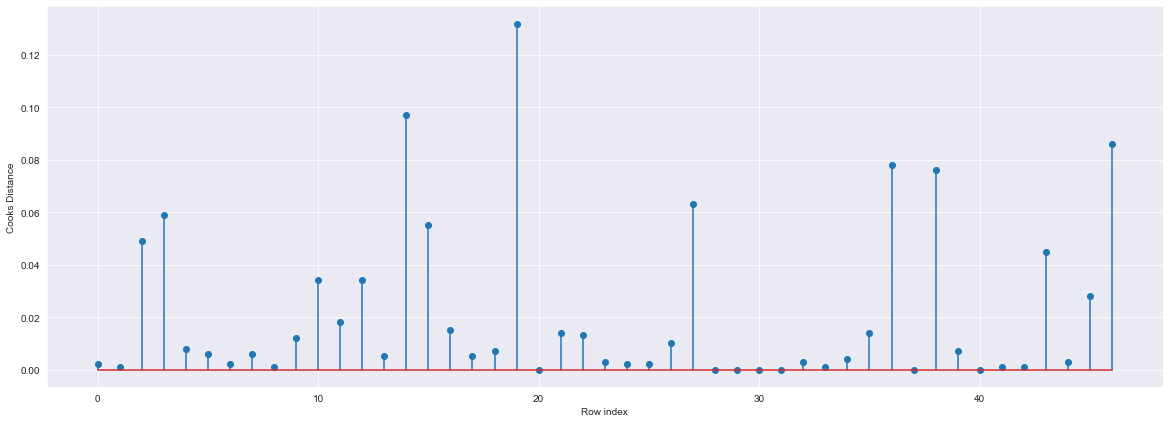

In [89]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stup4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [90]:
(np.argmax(c_V),np.max(c_V))

(19, 0.13150177617738304)

In [91]:
final_ml_m= smf.ols('p1~r1+m1+sa1+sb1+sc1',data = stup4).fit()

In [93]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.963199541998129, 976.0087982438863)

In [94]:
#New data for prediction
new_data=pd.DataFrame({'r1':150000,"m1":360000,"sa1":1,"sb1":0,"sc1":0},index=[1])

In [97]:
new_data

,r1,m1,sa1,sb1,sc1
1,150000,360000,1,0,0


In [96]:
final_ml_m.predict(new_data)

1    177788.952199
dtype: float64